# Fitting a quadriatic form
Here lets consider the problem of optimizing elements of a coefficient matrix $A$ that generates a polynomial through a quadriatic form:
$$Q(x) \equiv y^T A y = ax^2 + 2bx + c$$
where 
$$ A \equiv \begin{bmatrix}
a & b/2 \\
b/2 & c \\
\end{bmatrix}
\quad 
y \equiv \begin{bmatrix} x & 1 \end{bmatrix}^T
$$

In [293]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [300]:
w = torch.linspace(0,1,41,dtype=torch.float64) # for plotting
parameters_ideal = torch.tensor([1,2.5,-2],dtype=torch.float64)
parameters = torch.tensor([0,0,4],dtype=torch.float64,requires_grad=True)

def computeValues(parameters, w):
    a = parameters[0]
    b = parameters[1]
    c = parameters[2]
    
    # Define the coefficient matrix A
    A = torch.tensor([
        [a, b / 2],
        [b / 2, c]
    ], dtype=torch.float64)
    
    # Build the y tensor for all x values
    y = torch.stack([w**2, torch.ones_like(w)], dim=0)  # Shape: (2, len(xs))
    
    # Compute the polynomial values for all x
    Q = (y.T @ A @ y).diagonal()  # Efficient computation
    return Q

def computeError(parameters):
    polynomial_w = computeValues(parameters,w)
    polynomial_target = computeValues(parameters_ideal,w)
    # loss_real = torch.nn.MSELoss()(torch.real(polynomial_w), torch.real(polynomial_target))
    # loss_imag = nn.MSELoss()(torch.imag(polynomial_w), torch.real(polynomial_target))
    # loss = loss_real+loss_imag
    loss = torch.nn.MSELoss()(polynomial_w,polynomial_target)
    return loss

Iteration 0 : tensor([ 1.4971,  2.0025, -2.3868], dtype=torch.float64, requires_grad=True);  f = 0.004276192696659892
Iteration 20 : tensor([ 1.1433,  2.3567, -2.0248], dtype=torch.float64, requires_grad=True);  f = 0.010878972876129793
Iteration 40 : tensor([ 0.9997,  2.5010, -1.9920], dtype=torch.float64, requires_grad=True);  f = 0.0008105162383324833
Iteration 60 : tensor([ 0.9967,  2.5037, -1.9871], dtype=torch.float64, requires_grad=True);  f = 0.00022948382719143422
Iteration 80 : tensor([ 1.0050,  2.4951, -2.0047], dtype=torch.float64, requires_grad=True);  f = 9.411511934482018e-06
Ideal parameters: tensor([ 1.0000,  2.5000, -2.0000], dtype=torch.float64)


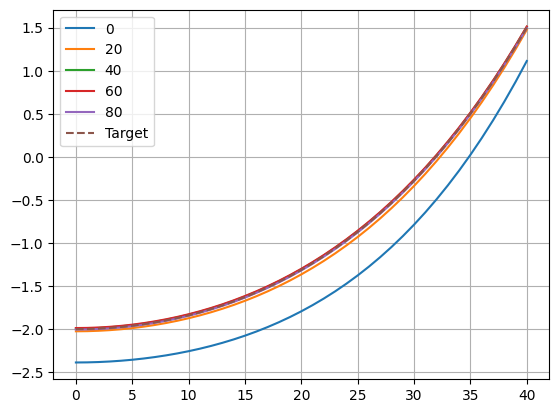

In [302]:
fig, axes = plt.subplots(); legend = []
optimizer = torch.optim.Adam([parameters], lr=0.5) # Adaptive algorithm, better
for i in range(100):
    optimizer.zero_grad()
    # f = computeError(parameters)
    f = torch.nn.MSELoss()(parameters_ideal,parameters)
    f.backward()
    optimizer.step()
    if(i%20==0):# and i> 50):
        print(f'Iteration {i} : {parameters};  f = {f.item()}')
        axes.plot((computeValues(parameters,w)).detach().numpy())
        legend.append(i)
legend.append('Target')
axes.plot((computeValues(parameters_ideal,w)).detach().numpy(),linestyle='dashed')
print(f'Ideal parameters: {parameters_ideal}')
axes.legend(legend)
axes.grid('on')